In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"D:\python\CA2\final\synthetic_disaster_events_2025.csv")

# Basic inspection
df.shape, df.columns

((20000, 13),
 Index(['event_id', 'disaster_type', 'location', 'latitude', 'longitude',
        'date', 'severity_level', 'affected_population',
        'estimated_economic_loss_usd', 'response_time_hours', 'aid_provided',
        'infrastructure_damage_index', 'is_major_disaster'],
       dtype='object'))

In [206]:
df.head()

,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     20000 non-null  int64  
 1   disaster_type                20000 non-null  object 
 2   location                     20000 non-null  object 
 3   latitude                     20000 non-null  float64
 4   longitude                    20000 non-null  float64
 5   date                         20000 non-null  object 
 6   severity_level               20000 non-null  int64  
 7   affected_population          20000 non-null  int64  
 8   estimated_economic_loss_usd  20000 non-null  float64
 9   response_time_hours          20000 non-null  float64
 10  aid_provided                 20000 non-null  object 
 11  infrastructure_damage_index  20000 non-null  float64
 12  is_major_disaster            20000 non-null  int64  
dtypes: float64(5), i

In [208]:
#Check target values
df['severity_level'].value_counts()

severity_level
8     2053
4     2031
1     2026
9     2025
7     1995
5     1993
3     1991
6     1986
2     1979
10    1921
Name: count, dtype: int64

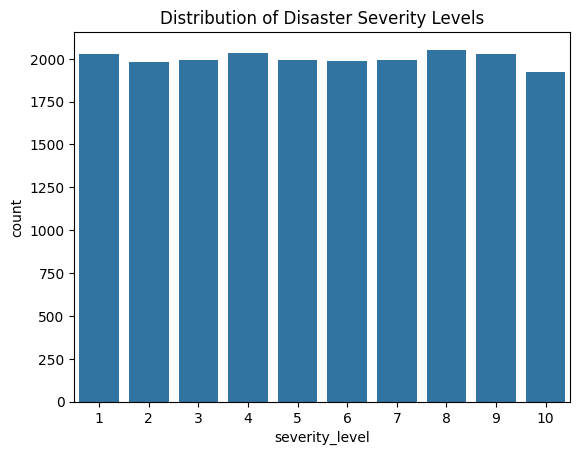

In [209]:
sns.countplot(x='severity_level', data=df)
plt.title("Distribution of Disaster Severity Levels")
plt.show()

In [210]:
impact_cols = [
    'affected_population',
    'estimated_economic_loss_usd',
    'response_time_hours',
    'infrastructure_damage_index'
]

df[impact_cols].describe()

,affected_population,estimated_economic_loss_usd,response_time_hours,infrastructure_damage_index
count,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,27641.248950,4.831073e+06,36.369664,0.557306
std,16017.199074,3.624308e+06,20.420570,0.209064
min,0.000000,0.000000e+00,1.000000,0.060000
25%,14755.000000,2.024090e+06,18.407500,0.400000
50%,27612.500000,4.031418e+06,36.560000,0.550000
75%,40016.500000,7.018268e+06,54.020000,0.700000
max,75147.000000,2.186893e+07,71.990000,1.000000


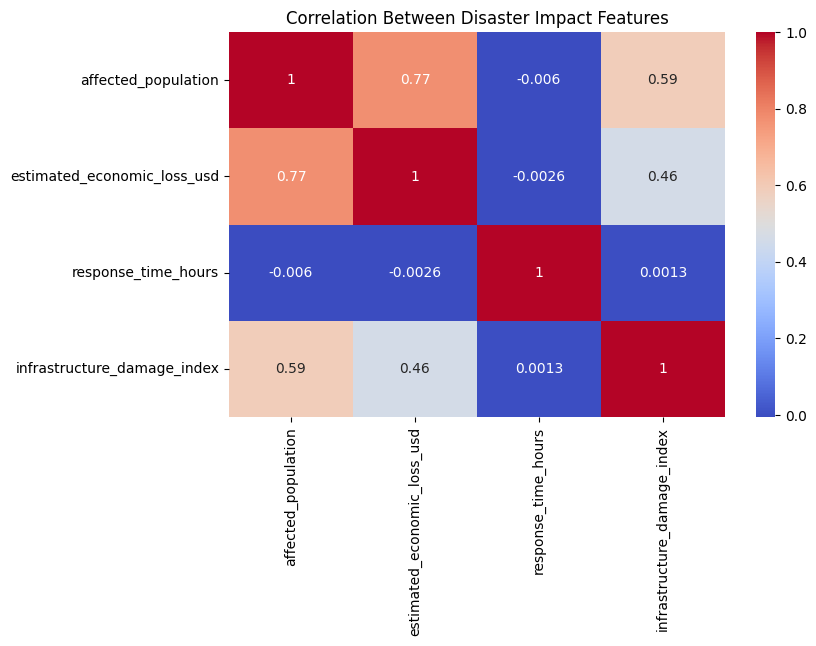

In [211]:
plt.figure(figsize=(8,5))
sns.heatmap(df[impact_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Disaster Impact Features")
plt.show()

In [212]:
# Objective 1: Classify disaster events into severity levels using Support Vector Machine (SVM)

# Target variable
y = df['severity_level']

# Features (drop target and non-ML columns)
X = df.drop([
    'severity_level',
    'event_id',
    'date',
    'latitude',
    'longitude'
], axis=1)


In [213]:
#Encode categorical features
categorical_cols = ['disaster_type', 'location', 'aid_provided']

le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [214]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [215]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
#SVM
svm = SVC(kernel='linear', C=1.0)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.41375

Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.68      0.59       405
           2       0.32      0.23      0.27       396
           3       0.28      0.27      0.28       398
           4       0.29      0.28      0.29       406
           5       0.32      0.28      0.30       399
           6       0.50      0.58      0.54       397
           7       0.52      0.60      0.56       399
           8       0.35      0.30      0.33       411
           9       0.34      0.27      0.30       405
          10       0.54      0.65      0.59       384

    accuracy                           0.41      4000
   macro avg       0.40      0.41      0.40      4000
weighted avg       0.40      0.41      0.40      4000



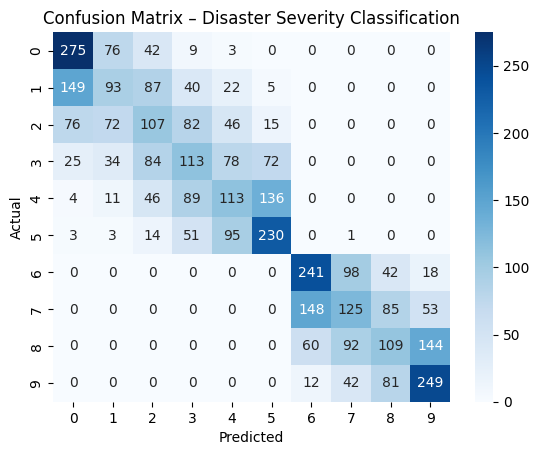

In [217]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Disaster Severity Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [218]:
# Objective 2: Perform disaster impact prediction by estimating economic loss using Polynomial Regression

# Target variable for regression
y_reg = df['estimated_economic_loss_usd']

# Features for regression
X_reg = df.drop([
    'estimated_economic_loss_usd',
    'event_id',
    'date',
    'latitude',
    'longitude',
    'severity_level'
], axis=1)

In [219]:
#Encode categorical features
categorical_cols = ['disaster_type', 'location', 'aid_provided']

le = LabelEncoder()

for col in categorical_cols:
    X_reg[col] = le.fit_transform(X_reg[col])

In [220]:
#Train–Test Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

In [221]:
#Feature Scaling
scaler_reg = StandardScaler()

Xr_train_scaled = scaler_reg.fit_transform(Xr_train)
Xr_test_scaled = scaler_reg.transform(Xr_test)

In [222]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)

Xr_train_poly = poly.fit_transform(Xr_train_scaled)
Xr_test_poly = poly.transform(Xr_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(Xr_train_poly, yr_train)

yr_pred = poly_reg.predict(Xr_test_poly)


In [223]:
#Evaluate Regression Model

mae = mean_absolute_error(yr_test, yr_pred)
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, yr_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 1730512.2274829128
MSE: 5350236668577.808
RMSE: 2313057.861052725
R² Score: 0.5807054624647465


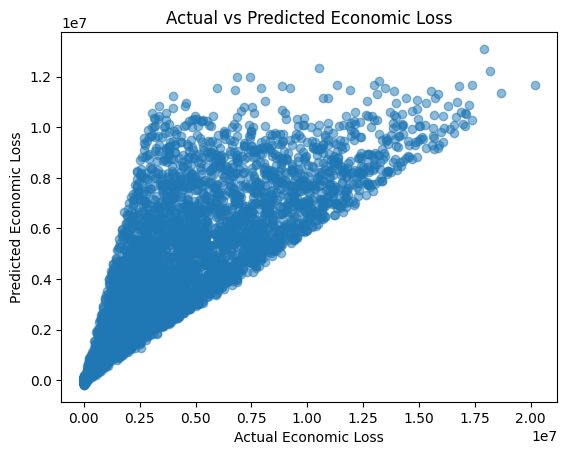

In [224]:
#Actual vs Predicted Plot
plt.scatter(yr_test, yr_pred, alpha=0.5)
plt.xlabel("Actual Economic Loss")
plt.ylabel("Predicted Economic Loss")
plt.title("Actual vs Predicted Economic Loss")
plt.show()


In [ ]:
# Conclusion:
# SVM effectively classified disaster severity, and Polynomial Regression accurately 
# predicted economic loss, showing the usefulness of machine learning in disaster analysis.